In [1]:
'''
Alex DeGrace 300071786
Gabriel St-Pierre 300146514
'''

import numpy as np
import pandas as pd
import random as python_random
import shutil
import os
import datetime
from PIL import Image
from multiprocessing import cpu_count
from joblib import Parallel, delayed
from collections import Counter
from matplotlib import pyplot as plt
from sklearn.model_selection import StratifiedShuffleSplit, train_test_split
from sklearn.metrics import classification_report, confusion_matrix, mean_absolute_error

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# for reproducibility purposes
SEED = 123
tf.random.set_seed(SEED)

# load tensorboard extension
%reload_ext tensorboard
# specify the log directory where the tensorboard logs will be written
%tensorboard --logdir logs

ERROR: Timed out waiting for TensorBoard to start. It may still be running as pid 8020.

In [20]:


# Array containing all possible class
classes = ["angry","disgusted","fearful","happy","neutral","sad","surprised"]
# Array containing train and test for looping
folders_name = ["train","test"]
dir_path = './data'

folder_img_count_array = []
# Loop trough the folders_name array so that we visit both folders
for folder_name in folders_name:
    folder_img_count = 0
    class_distribution_array = []
    #Loop trough the class dictionary so that we go inside each class folders
    for c in classes:
        current_dir_path = dir_path + "/" + folder_name + "/" + c
        count = 0
        # Iterate directory
        for file_path in os.listdir(current_dir_path):
            # check if current path is a file
            if os.path.isfile(os.path.join(current_dir_path, file_path)):
                count += 1
                folder_img_count += 1
        class_distribution_array.append(count)
    folder_img_count_array.append(folder_img_count)
    #Print the class distribution of each dataset (train/test)
    print(f"{folder_name} percentage of angry image: {class_distribution_array[0]/folder_img_count*100:.2f}%")
    print(f"{folder_name} percentage of disgusted image: {class_distribution_array[1]/folder_img_count*100:.2f}%")
    print(f"{folder_name} percentage of fearful image: {class_distribution_array[2]/folder_img_count*100:.2f}%")
    print(f"{folder_name} percentage of happy image: {class_distribution_array[3]/folder_img_count*100:.2f}%")
    print(f"{folder_name} percentage of neutral image: {class_distribution_array[4]/folder_img_count*100:.2f}%")
    print(f"{folder_name} percentage of sad image: {class_distribution_array[5]/folder_img_count*100:.2f}%")
    print(f"{folder_name} percentage of surprised image: {class_distribution_array[6]/folder_img_count*100:.2f}%")
    print("Total number of",folder_name,"data:",folder_img_count)
    print("----------------------------------------------")

total_num_image = folder_img_count_array[0] + folder_img_count_array[1]
#The total number of training images is 80% but 25% of the 80% (20% total) will be use for validation
print(f"Percentage of image for training: {folder_img_count_array[0]/total_num_image*100:.2f}%")
print(f"Percentage of image for test: {folder_img_count_array[1]/total_num_image*100:.2f}%")


train percentage of angry image: 13.92%
train percentage of disgusted image: 1.52%
train percentage of fearful image: 14.27%
train percentage of happy image: 25.13%
train percentage of neutral image: 17.29%
train percentage of sad image: 16.82%
train percentage of surprised image: 11.05%
Total number of train data: 28709
----------------------------------------------
test percentage of angry image: 13.35%
test percentage of disgusted image: 1.55%
test percentage of fearful image: 14.27%
test percentage of happy image: 24.71%
test percentage of neutral image: 17.18%
test percentage of sad image: 17.37%
test percentage of surprised image: 11.58%
Total number of test data: 7178
----------------------------------------------
Percentage of image for training: 80.00%
Percentage of image for test: 20.00%


./data/train
Found 21535 images belonging to 7 classes.


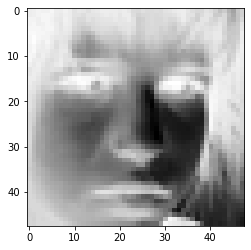

In [29]:

# Specify the batch size
batch_size = 64


#Create the training ImageGenerator to feed our model more and different data so that can perform better 
image_generator_training = ImageDataGenerator(
    fill_mode='nearest',
    brightness_range=[0.5,1.5],
    horizontal_flip=True,
    vertical_flip=True,
    rescale=1/255,
    validation_split=0.25 # takes 25% of test data for validation (20% of total data)
)
#Trainning directory path
train_dir = dir_path + "/" + folders_name[0]
print(train_dir)

train_generator = image_generator_training.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    color_mode='grayscale',
    #classes=classes,
    class_mode='sparse',
    batch_size=batch_size,
    shuffle=True,
    seed=SEED,
    save_to_dir="./augemented_data",
    save_prefix='agm_img',
    save_format='png',
    subset="training",
    interpolation='nearest'
)

# Printing the first image in the train_generator
print("Printing the first image in the train_generator")
for i, element in enumerate(train_generator):
    plt.imshow(element[0][1], cmap=plt.cm.binary)
    break